In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

fraud = pd.read_csv('~/data/fraud.csv')

In [5]:
fraud

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,...,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


# 할 일

- [] Column Name 가독성 높이기
    - [] Drop Column
- [] Drop Duplicates
- [] Missing Value
- [] Outlier
- [] Create New Feature
    - [] dob -> age
    - [] amt
    - [] time
    - [] lon/lat

## Columns description
trans_date_trans_time: The date and time of the transaction.

cc_num: credit card number.

merchant: Merchant who was getting paid.

category: In what area does that merchant deal.

amt: Amount of money in American Dollars.

first: first name of the card holder.

last: last name of the card holder.

gender: Gender of the cardholder.Just male and female!

street:Street of card holder residence

city:city of card holder residence

state:state of card holder residence

zip:ZIP code of card holder residence

lat:latitude of card holder

long:longitude of card holder

city_pop:Population of the city

job:trade of the card holder

dob:Date of birth of the card holder

trans_num: Transaction ID

unix_time: Unix time which is the time calculated since 1970 to today.

merch_lat: latitude of the merchant

merch_long:longitude of the merchant

is_fraud: Whether the transaction is fraud(1) or not(0)

In [6]:
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

# 불필요한 칼럼 제거

In [8]:
fraud.columns

# 제거 할 컬럼
## 'first', 'last','street', 'city', 'state', 'unix_time'
### zip 은 long/lat 활용 못할 경우 대비해서 살려두기

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
pd.Series(fraud.columns)

# 뺄거 5, 6, 8-10, 18

0     trans_date_trans_time
1                    cc_num
2                  merchant
3                  category
4                       amt
5                     first
6                      last
7                    gender
8                    street
9                      city
10                    state
11                      zip
12                      lat
13                     long
14                 city_pop
15                      job
16                      dob
17                trans_num
18                unix_time
19                merch_lat
20               merch_long
21                 is_fraud
dtype: object

In [10]:
drop_col = fraud.columns[[5, 6, 8, 9, 10, 18]]

In [11]:
fraud = fraud.drop(drop_col, axis = 1)

# Duplicate 제거

In [12]:
fraud[fraud.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud


In [13]:
# duplicate 없음!

# Missing Value

In [14]:
fraud.isna().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
gender                   0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [15]:
# Missing Value 없음! 놀랍다!!

# Outlier

In [16]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   gender                 491134 non-null  object 
 6   zip                    491134 non-null  int64  
 7   lat                    491134 non-null  float64
 8   long                   491134 non-null  float64
 9   city_pop               491134 non-null  int64  
 10  job                    491134 non-null  object 
 11  dob                    491134 non-null  object 
 12  trans_num              491134 non-null  object 
 13  merch_lat              491134 non-null  float64
 14  merch_long             491134 non-nu

In [17]:
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,49.887523,-68.965624,1.000000


In [18]:
# cc_num

## 자릿수 맞나 보자
### 원래 다 16자리 아닌가? 

fraud['cc_len'] = fraud['cc_num'].astype(str).apply(lambda x: len(x))

In [19]:
fraud[fraud['cc_len'] != 16]

## 22,761 rows....

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,cc_len
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,12
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0,19
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0,15
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,42.360426,-83.552316,0,15
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,F,39073,32.1530,-90.1217,19685,Fine artist,1984-12-24,7bb25a43205191eb7344282b88fc54d3,31.939812,-90.726209,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491120,2020-12-31 23:39:06,4536996888716062123,fraud_Kub PLC,personal_care,16.72,M,87533,35.9866,-106.0654,18408,Historic buildings inspector/conservation officer,1972-07-18,55b9e60e40414115fc70d3b6d5e8bf40,35.935541,-107.052071,0,19
491122,2020-12-31 23:40:11,372520049757633,"fraud_Lesch, D'Amore and Brown",food_dining,8.27,F,56668,48.6031,-93.2977,136,Ceramics designer,2000-02-20,d4d8394b102dc78e8d74db5ebe801695,48.274700,-94.001549,0,15
491124,2020-12-31 23:43:07,30238755902988,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,7.43,F,76578,30.5920,-97.2893,1766,Press sub,1976-01-02,d0f906757e93b9d51c757b8a8b8d27ea,29.831181,-97.742957,0,14
491127,2020-12-31 23:50:34,371226440126102,fraud_Cartwright PLC,kids_pets,43.54,F,62262,38.9311,-89.2463,1810,Race relations officer,1974-12-24,c1869fcb0b70ba02f9e8811b920dd8ab,39.121026,-88.866295,0,15


In [20]:
fraud.corr()

# is_fraud 와의 상관 관계가 안보이므로 살려주도록 한다
# 인터넷 검색해보니 꼭 16자리 아니어도 된다고 한다..

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,cc_len
cc_num,1.000000,-0.001493,-0.028796,-0.056955,0.063096,-0.079608,-0.056440,0.062831,0.000386,0.653289
amt,-0.001493,1.000000,0.010594,-0.010891,-0.006443,0.013511,-0.010698,-0.006415,0.128526,0.004806
zip,-0.028796,0.010594,1.000000,-0.125387,-0.920683,0.119094,-0.124937,-0.919777,-0.003005,-0.091472
lat,-0.056955,-0.010891,-0.125387,1.000000,-0.011717,-0.244435,0.994201,-0.011688,0.000827,-0.027921
long,0.063096,-0.006443,-0.920683,-0.011717,1.000000,-0.075060,-0.011403,0.999013,0.002771,0.091320
city_pop,-0.079608,0.013511,0.119094,-0.244435,-0.075060,1.000000,-0.243132,-0.074954,-0.005630,-0.146624
merch_lat,-0.056440,-0.010698,-0.124937,0.994201,-0.011403,-0.243132,1.000000,-0.011378,0.000915,-0.027591
merch_long,0.062831,-0.006415,-0.919777,-0.011688,0.999013,-0.074954,-0.011378,1.000000,0.002715,0.091071
is_fraud,0.000386,0.128526,-0.003005,0.000827,0.002771,-0.005630,0.000915,0.002715,1.000000,0.000771
cc_len,0.653289,0.004806,-0.091472,-0.027921,0.091320,-0.146624,-0.027591,0.091071,0.000771,1.000000


In [21]:
fraud.drop('cc_len', axis = 1, inplace = True)

In [22]:
# zip
## 이건 자릿수 같아야하는거 아닌가

fraud[fraud['zip'] < 10000]

## 아닌가보다. 차라리 lat long 이 같은데 zip 다른걸 찾는게 낫겠다

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,40.021888,-74.228188,0
11,2019-01-01 00:44:43,2720433095629877,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,62.54,M,4287,44.0575,-69.9656,3224,"Engineer, electronics",1997-08-22,2eb55ba0572d67a64baaa8c463878d8c,43.585423,-70.449359,0
16,2019-01-01 01:01:48,6534628260579800,fraud_Torp-Labadie,gas_transport,52.59,F,5461,44.3346,-73.0980,4542,Claims inspector/assessor,1998-03-19,2686067ebeee0aa355a750faf309384e,45.084808,-73.626071,0
20,2019-01-01 01:09:57,180048185037117,"fraud_Rippin, Kub and Mann",misc_net,3.79,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,7c63dd07b14aac7dc99f4587d83dd599,40.813669,-75.283465,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491008,2020-12-31 21:53:16,180048185037117,fraud_Thiel-Thiel,entertainment,84.72,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,d902183cab7041544820e97aa9fe5d43,40.785712,-73.590531,0
491023,2020-12-31 22:02:30,3531129874770000,fraud_Gibson-Deckow,entertainment,165.34,F,5733,43.8065,-73.0882,5895,"Scientist, marine",1975-07-13,422e69b05b82ab0ad08d9ed501a60c6a,43.915098,-72.214479,0
491046,2020-12-31 22:24:38,342952484382519,fraud_Mosciski Group,travel,6.03,F,6024,42.0158,-73.2913,647,Comptroller,1987-09-26,aa6d1f4a1056f168676816145f3dd2f1,42.668599,-72.385026,0
491049,2020-12-31 22:30:10,180048185037117,fraud_Bauch-Blanda,entertainment,84.48,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,e3c3a25602b06dbdc12fa3a9d75cb7ad,40.729908,-74.177638,0


In [23]:
fraud.groupby(['lat', 'long'])['zip'].unique()

lat      long     
24.6557  -81.3824     [33040]
26.4215  -99.0025     [78584]
26.4722  -81.8122     [33967]
27.4703  -81.4872     [33872]
29.0393  -95.4401     [77566]
                       ...   
47.4974  -122.0107    [98027]
48.2777  -112.8456    [59448]
48.3400  -122.3456    [98238]
48.6031  -93.2977     [56668]
48.8878  -118.2105    [99160]
Name: zip, Length: 124, dtype: object

In [24]:
grouped = fraud.groupby(['lat', 'long'])['zip'].unique()
print(grouped[grouped.apply(lambda x: len(x) > 1)]) 

#checks whether there are more than one unique zip codes in each group
# 이상치는 보이지 않음. lon lat 도 +-90, +- 180 범위 안에 있음

Series([], Name: zip, dtype: object)


In [25]:
# merchant 날릴까?

fraud['merchant'].value_counts()
# 어차피 merch lat long 있으니 날리자

fraud_Kilback LLC                      1602
fraud_Cormier LLC                      1455
fraud_Kuhn LLC                         1446
fraud_Schumm PLC                       1392
fraud_Boyer PLC                        1375
                                       ... 
fraud_Little-Gleichner                  228
fraud_Douglas, DuBuque and McKenzie     228
fraud_Satterfield-Lowe                  227
fraud_Reichert-Weissnat                 226
fraud_Jerde-Hermann                     226
Name: merchant, Length: 693, dtype: int64

In [26]:
fraud.drop('merchant', axis = 1, inplace = True)

In [27]:
# tx_id 가 필요한가? 어차피 중복값 없는 인덱스... 날리자

fraud.drop('trans_num', axis = 1, inplace = True)

# 할 일

- [] Column Name 가독성 높이기
    - [v] Drop Column
- [v] Drop Duplicates
- [v] Missing Value
- [v] Outlier
- [] Create New Feature
    - [v] dob -> age
    - [] amt
    - [] time
    - [] lon/lat

# 확인 필요
- [v] merchant : fraud 로 시작 안하는 애들?
- [] category : 2 depth
- [v] dob : age 로 바꾸기
- [] job : categorize
- [] 새벽 1-6시 사이 큰 금액 결제

# Create New Feature

In [28]:
fraud

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,F,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,F,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0


In [29]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   category               491134 non-null  object 
 3   amt                    491134 non-null  float64
 4   gender                 491134 non-null  object 
 5   zip                    491134 non-null  int64  
 6   lat                    491134 non-null  float64
 7   long                   491134 non-null  float64
 8   city_pop               491134 non-null  int64  
 9   job                    491134 non-null  object 
 10  dob                    491134 non-null  object 
 11  merch_lat              491134 non-null  float64
 12  merch_long             491134 non-null  float64
 13  is_fraud               491134 non-null  int64  
dtypes: float64(5), int64(4), object(5)
m

## dob -> age

In [30]:
# dob -> age

fraud['dob'] = pd.to_datetime(fraud['dob'])

In [31]:
fraud.info()

# datetime64[ns]. ns -> nano second

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  object        
 1   cc_num                 491134 non-null  int64         
 2   category               491134 non-null  object        
 3   amt                    491134 non-null  float64       
 4   gender                 491134 non-null  object        
 5   zip                    491134 non-null  int64         
 6   lat                    491134 non-null  float64       
 7   long                   491134 non-null  float64       
 8   city_pop               491134 non-null  int64         
 9   job                    491134 non-null  object        
 10  dob                    491134 non-null  datetime64[ns]
 11  merch_lat              491134 non-null  float64       
 12  merch_long             491134 non-null  floa

In [32]:
from datetime import datetime

fraud['age'] = datetime.now().year - fraud['dob'].dt.year

In [33]:
fraud.drop('dob', axis = 1, inplace = True)

## amt - binning

<AxesSubplot:>

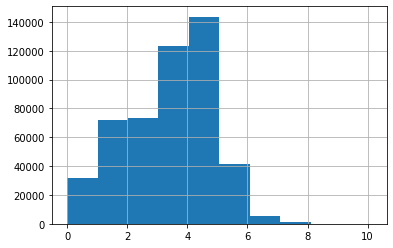

In [34]:
# amt

import matplotlib.pyplot as plt

np.log(fraud['amt']).hist()
# 엥 로그를 이렇게 하는게 아닌가보다

In [35]:
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,age
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,37.930272,-90.495411,0.002533,39.615769
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,5.372986,13.004100,0.050264,9.297579
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,23.655789,-123.345106,0.000000,20.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,33.781388,-96.984814,0.000000,32.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,38.545124,-87.573441,0.000000,40.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,41.624294,-80.685567,0.000000,48.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,49.887523,-68.965624,1.000000,54.000000


In [36]:
fraud[fraud['amt'] > 20000]

# fraud 가 아니니까 outlier 지워주자
# (30분 후) outlier 안지우고 binning 했어도 됐을 듯

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age
93045,2019-06-14 20:15:38,5540636818935089,travel,25086.94,M,1843,42.6911,-71.1605,76383,Geoscientist,42.397174,-71.474163,0,39


In [37]:
fraud.drop(fraud[fraud['amt'] > 20000].index, inplace = True)

<AxesSubplot:>

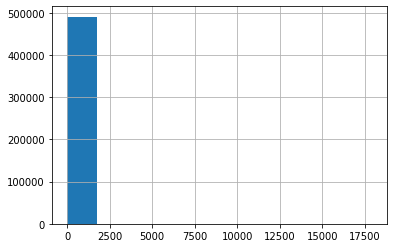

In [38]:
fraud['amt'].hist()

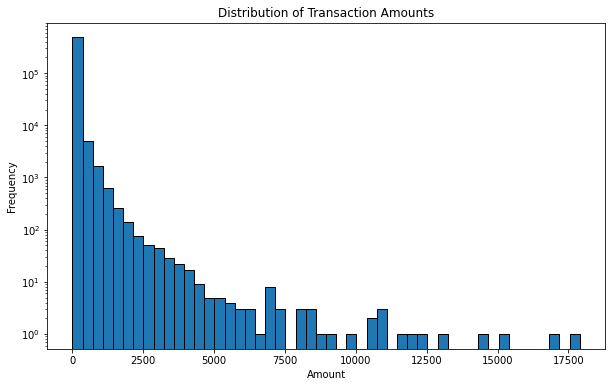

In [39]:

# Create a histogram of the 'amount' column
plt.figure(figsize=(10, 6))
plt.hist(fraud['amt'], bins=50, edgecolor='black', log = True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Example bin edges - you'll need to modify these based on your histogram observation
bin_edges = [0, 1000, 3000, 7000, fraud['amt'].max()]
labels = ['0:1000', '1001:3000', '3001:7000', '7001:18000']

# Bin the 'amount' column
fraud['amt_binned'] = pd.cut(fraud['amt'], bins=bin_edges, labels=labels)

# Display the first few rows to verify
print(fraud.head())


  trans_date_trans_time               cc_num     category     amt gender  \
0   2019-01-01 00:00:44         630423337322  grocery_pos  107.23      F   
1   2019-01-01 00:12:34  4956828990005111019  grocery_pos   44.71      M   
2   2019-01-01 00:17:16      180048185037117  grocery_net   46.28      F   
3   2019-01-01 00:20:15      374930071163758  grocery_pos   64.09      M   
4   2019-01-01 00:23:41     2712209726293386     misc_pos   25.58      F   

     zip      lat      long  city_pop                                job  \
0  99160  48.8878 -118.2105       149  Special educational needs teacher   
1   7208  40.6747  -74.2239    124967             Operational researcher   
2   7060  40.6152  -74.4150     71485             Leisure centre manager   
3  48174  42.2203  -83.3583     31515                     Police officer   
4  70808  30.4066  -91.1468    378909                Designer, furniture   

   merch_lat  merch_long  is_fraud  age amt_binned  
0  49.159047 -118.186462         

In [41]:
fraud['amt'].max()

17897.24

# 할 일

- [] Column Name 가독성 높이기
    - [v] Drop Column
- [v] Drop Duplicates
- [v] Missing Value
- [v] Outlier
- [] Create New Feature
    - [v] dob -> age
    - [v] amt
    - [v] time
    - [] lon/lat

# 확인 필요
- [v] merchant : fraud 로 시작 안하는 애들?
- [] category : 2 depth
- [v] dob : age 로 바꾸기
- [] job : categorize
- [] 새벽 1-6시 사이 큰 금액 결제
- [] 거주지 lat lon 과 merch lat lon 멀 경우

## datetime

- datetime 에서 어떤 정보가 사기 예측에 유용할까?
- 년
- 월
- 주차
- 요일
- 하루의 시간대

- **일단 시간이 없으니 is_weekend , Abnorm_tod 두 개 칼럼만 만들자**

In [42]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491133 entries, 0 to 491133
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   trans_date_trans_time  491133 non-null  object  
 1   cc_num                 491133 non-null  int64   
 2   category               491133 non-null  object  
 3   amt                    491133 non-null  float64 
 4   gender                 491133 non-null  object  
 5   zip                    491133 non-null  int64   
 6   lat                    491133 non-null  float64 
 7   long                   491133 non-null  float64 
 8   city_pop               491133 non-null  int64   
 9   job                    491133 non-null  object  
 10  merch_lat              491133 non-null  float64 
 11  merch_long             491133 non-null  float64 
 12  is_fraud               491133 non-null  int64   
 13  age                    491133 non-null  int64   
 14  amt_binned          

In [43]:
fraud['trans_date_trans_time'] = pd.to_datetime(fraud['trans_date_trans_time'])
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491133 entries, 0 to 491133
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491133 non-null  datetime64[ns]
 1   cc_num                 491133 non-null  int64         
 2   category               491133 non-null  object        
 3   amt                    491133 non-null  float64       
 4   gender                 491133 non-null  object        
 5   zip                    491133 non-null  int64         
 6   lat                    491133 non-null  float64       
 7   long                   491133 non-null  float64       
 8   city_pop               491133 non-null  int64         
 9   job                    491133 non-null  object        
 10  merch_lat              491133 non-null  float64       
 11  merch_long             491133 non-null  float64       
 12  is_fraud               491133 non-null  int6

In [44]:
# is_weekend

fraud['is_weekend'] = (fraud['trans_date_trans_time'].dt.dayofweek >= 5).astype(int)   # sat sun

In [45]:
fraud['is_weekend'].mean()

0.3325901537872633

In [46]:
# abnorm_tod
## 00 - 06 시

fraud['abnorm_tod'] = (fraud['trans_date_trans_time'].dt.hour < 6).astype(int)

In [47]:
fraud['abnorm_tod'].mean()

0.1407113755337149

## lon/lat
- 거주지와 결제위치가 멀 경우
- 우선 각각 시각화 해보자
- 'abnorm_dist' 칼럼 만들기

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Assuming your DataFrame is named df with columns 'lat' for latitude and 'lon' for longitude
# Example: df = pd.DataFrame({'lat': [40.7128, 51.5074], 'lon': [-74.0060, -0.1278]})

# Create a Basemap instance
plt.figure(figsize=(12, 6))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=65, llcrnrlon=-180, urcrnrlon=180, lat_ts=0, resolution='c')

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert lat and lon to map projection coordinates
lons, lats = m(fraud['long'].values, fraud['lat'].values)

# Plot points
m.scatter(lons, lats, marker='o', color='red')

plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [49]:
# lms 에 뭔가 설치가 안되서 갈아탐

import folium
from folium.plugins import MarkerCluster

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

marker_cluster = MarkerCluster().add_to(m)  # Add this before adding markers

# Assuming your DataFrame is named df with columns 'lat' for latitude and 'lon' for longitude
# Example: df = pd.DataFrame({'lat': [40.7128, 51.5074], 'lon': [-74.0060, -0.1278]})

# Add points
for _, row in fraud.iterrows():
    folium.Marker(location=[row['lat'], row['long']],
                        radius=5,
                        color='red',
                        fill=True).add_to(marker_cluster)

# Display the map
# m

# 하루 종일 걸림. 데이터가 여러 개라는 걸 깜빡했다. cluster 해줘야겠다
## outlier - city name vs lon/lat 비교하는 걸 깜빡했다. 바쁘니 그냥 진행!

In [88]:
# 히트맵이 더 빠르대서 도전
## file size 문제로 이건 첨부하지 않는걸로


import folium
from folium.plugins import HeatMap

# First, create the map object 'm'
# The location is a central point (latitude, longitude) for initializing the map view
# You can adjust the 'location' parameter based on your data
m = folium.Map(location=[20, 0], zoom_start=2)

# Assuming 'fraud' is your DataFrame and it has 'lat' and 'long' columns
# Now, add the HeatMap layer to the map object 'm'
HeatMap(data=fraud[['lat', 'long']].values.tolist()).add_to(m)

# To display the map in a Jupyter Notebook
# m


In [87]:
# 이번에는 merch
## file size 문제로 이건 첨부하지 않는걸로

import folium
from folium.plugins import HeatMap

# First, create the map object 'm_merch'
# The location is a central point (latitude, longitude) for initializing the map view
# You can adjust the 'location' parameter based on your data
m_merch = folium.Map(location=[20, 0], zoom_start=2)

# Assuming 'fraud' is your DataFrame and it has 'lat' and 'long' columns
# Now, add the HeatMap layer to the map object 'm'
HeatMap(data=fraud[['merch_lat', 'merch_long']].values.tolist()).add_to(m_merch)

# To display the map in a Jupyter Notebook
# m_merch

In [52]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491133 entries, 0 to 491133
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491133 non-null  datetime64[ns]
 1   cc_num                 491133 non-null  int64         
 2   category               491133 non-null  object        
 3   amt                    491133 non-null  float64       
 4   gender                 491133 non-null  object        
 5   zip                    491133 non-null  int64         
 6   lat                    491133 non-null  float64       
 7   long                   491133 non-null  float64       
 8   city_pop               491133 non-null  int64         
 9   job                    491133 non-null  object        
 10  merch_lat              491133 non-null  float64       
 11  merch_long             491133 non-null  float64       
 12  is_fraud               491133 non-null  int6

In [53]:
# all tx in US
# 이제 고객 주소와 상점 주소가 먼 곳을 구해보자
## 우선 그 둘의 거리부터 구해보자

import pandas as pd
from geopy.distance import geodesic


# Define a function to calculate distance
def calculate_distance(row):
    cardholder_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return geodesic(cardholder_location, merchant_location).kilometers  # distance in kilometers

# Apply the function to calculate distance for each row
fraud['distance'] = fraud.apply(calculate_distance, axis=1)
fraud.head()

# 엄청 오래걸리네..

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,amt_binned,is_weekend,abnorm_tod,distance
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,46,0:1000,0,1,30.216618
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,Operational researcher,40.079588,-74.848087,0,44,0:1000,0,1,84.714605
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,Leisure centre manager,40.021888,-74.228188,0,50,0:1000,0,1,67.768167
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,Police officer,42.360426,-83.552316,0,53,0:1000,0,1,22.322745
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,70808,30.4066,-91.1468,378909,"Designer, furniture",29.737426,-90.853194,0,47,0:1000,0,1,79.398244


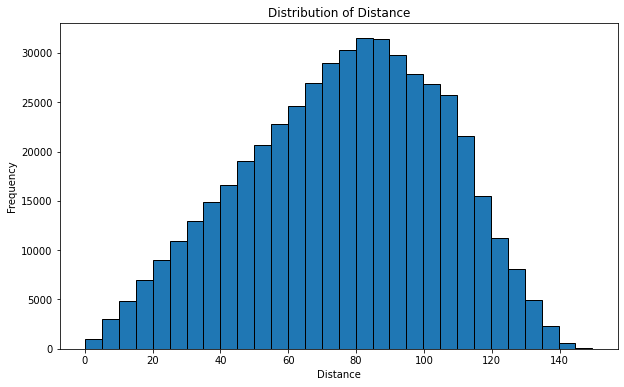

In [54]:
# distance 의 histogram

plt.figure(figsize=(10, 6))
plt.hist(fraud['distance'], bins=30, edgecolor='black')
plt.title('Distribution of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# 그래프를 보니 뭔가 잘못된것이 틀림없다.. 하지만 그냥 진행한다

In [55]:
fraud.groupby('is_fraud')['distance'].mean()

is_fraud
0    76.370753
1    76.753536
Name: distance, dtype: float64

# 할 일

- [v] Column Name 가독성 높이기
    - [v] Drop Column
- [v] Drop Duplicates
- [v] Missing Value
- [v] Outlier
- [] Create New Feature
    - [v] dob -> age
    - [v] amt
    - [v] time
    - [v] lon/lat

# 확인 필요
- [v] merchant : fraud 로 시작 안하는 애들?
- [] category : 2 depth
- [v] dob : age 로 바꾸기
- [] job : categorize
- [] 새벽 1-6시 사이 큰 금액 결제
- [] 거주지 lat lon 과 merch lat lon 멀 경우

## category

In [56]:
fraud['category'].value_counts().sort_index()
# net / pos 가 온/오프라인 결제인 것 같은데, 나머지 칼럼들은 나눠져있지 않아서 따로 구분이 어려움

entertainment     33619
food_dining       35980
gas_transport     46029
grocery_net       24486
grocery_pos       42722
health_fitness    31415
home              43340
kids_pets         40295
misc_net          25179
misc_pos          32411
personal_care     35513
shopping_net      39179
shopping_pos      48345
travel            12620
Name: category, dtype: int64

In [57]:
fraud.corr()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,is_weekend,abnorm_tod,distance
cc_num,1.000000,-0.001437,-0.028798,-0.056955,0.063097,-0.079608,-0.056439,0.062832,0.000386,-0.023015,-0.004579,0.003711,0.001392
amt,-0.001437,1.000000,0.011460,-0.011461,-0.007094,0.013899,-0.011244,-0.007057,0.131852,0.023338,0.001326,0.046657,-0.000951
zip,-0.028798,0.011460,1.000000,-0.125384,-0.920683,0.119094,-0.124935,-0.919777,-0.003005,0.055057,-0.002807,-0.001774,0.007977
lat,-0.056955,-0.011461,-0.125384,1.000000,-0.011720,-0.244435,0.994201,-0.011690,0.000827,-0.019184,0.000618,-0.002707,-0.074484
long,0.063097,-0.007094,-0.920683,-0.011720,1.000000,-0.075059,-0.011405,0.999013,0.002772,-0.110382,0.004331,0.000841,0.002036
city_pop,-0.079608,0.013899,0.119094,-0.244435,-0.075059,1.000000,-0.243132,-0.074953,-0.005630,0.036666,0.002138,0.002370,0.017785
merch_lat,-0.056439,-0.011244,-0.124935,0.994201,-0.011405,-0.243132,1.000000,-0.011380,0.000916,-0.019276,0.000511,-0.002829,-0.074656
merch_long,0.062832,-0.007057,-0.919777,-0.011690,0.999013,-0.074953,-0.011380,1.000000,0.002715,-0.110253,0.004259,0.000887,0.002099
is_fraud,0.000386,0.131852,-0.003005,0.000827,0.002772,-0.005630,0.000916,0.002715,1.000000,-0.004231,-0.002299,0.047175,0.000660
age,-0.023015,0.023338,0.055057,-0.019184,-0.110382,0.036666,-0.019276,-0.110253,-0.004231,1.000000,-0.036967,0.038102,0.003469


## Job

In [58]:
fraud['job'].value_counts()

Environmental consultant    8777
Comptroller                 8766
Immunologist                8760
Water engineer              8740
Film/video editor           8035
                            ... 
Energy engineer             3642
Intelligence analyst        3641
Physiotherapist             3638
Herbalist                   3638
Toxicologist                3638
Name: job, Length: 110, dtype: int64

In [59]:
# 110개... job 칼럼은 날린다

fraud.drop('job', axis = 1, inplace = True)

## city_pop

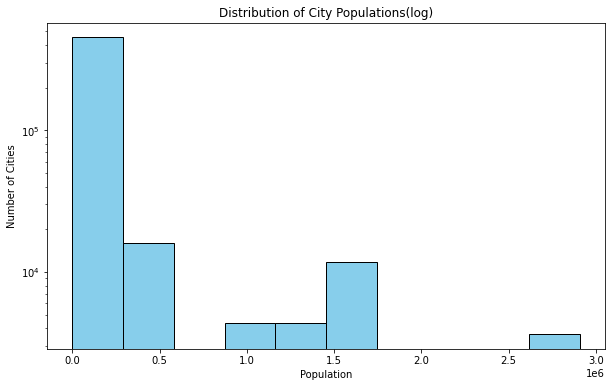

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(fraud['city_pop'], edgecolor='black', color='skyblue', log = True)

# Adding titles and labels
plt.title('Distribution of City Populations(log)')
plt.xlabel('Population')
plt.ylabel('Number of Cities')

# Show the plot
plt.show()

In [61]:
# city_pop -> categorize

bins = [0, 300000, 1500000, fraud['city_pop'].max()]
labels = ['S', 'M', 'L']

# Bin the 'amount' column
fraud['city_pop_binned'] = pd.cut(fraud['city_pop'], bins=bins, labels=labels)

# Display the first few rows to verify
fraud.head()

# city_pop 은 날리기
fraud.drop('city_pop', axis = 1, inplace = True)

## column 이름 바꿔주는걸 깜빡했다

In [62]:
fraud.rename({'trans_date_trans_time' : 'tx_datetime'}, axis = 1, inplace = True)

In [63]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491133 entries, 0 to 491133
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tx_datetime      491133 non-null  datetime64[ns]
 1   cc_num           491133 non-null  int64         
 2   category         491133 non-null  object        
 3   amt              491133 non-null  float64       
 4   gender           491133 non-null  object        
 5   zip              491133 non-null  int64         
 6   lat              491133 non-null  float64       
 7   long             491133 non-null  float64       
 8   merch_lat        491133 non-null  float64       
 9   merch_long       491133 non-null  float64       
 10  is_fraud         491133 non-null  int64         
 11  age              491133 non-null  int64         
 12  amt_binned       491133 non-null  category      
 13  is_weekend       491133 non-null  int64         
 14  abnorm_tod       491

# One Hot Encoding

In [64]:
final_df = pd.get_dummies(fraud)

# datetime 있었네
final_df.drop('tx_datetime', axis = 1, inplace = True)

In [79]:
final_df

,cc_num,amt,zip,lat,long,merch_lat,merch_long,is_fraud,age,is_weekend,...,category_travel,gender_F,gender_M,amt_binned_0:1000,amt_binned_1001:3000,amt_binned_3001:7000,amt_binned_7001:18000,city_pop_binned_S,city_pop_binned_M,city_pop_binned_L
0,630423337322,107.23,99160,48.8878,-118.2105,49.159047,-118.186462,0,46,0,...,0,1,0,1,0,0,0,1,0,0
1,4956828990005111019,44.71,7208,40.6747,-74.2239,40.079588,-74.848087,0,44,0,...,0,0,1,1,0,0,0,1,0,0
2,180048185037117,46.28,7060,40.6152,-74.4150,40.021888,-74.228188,0,50,0,...,0,1,0,1,0,0,0,1,0,0
3,374930071163758,64.09,48174,42.2203,-83.3583,42.360426,-83.552316,0,53,0,...,0,0,1,1,0,0,0,1,0,0
4,2712209726293386,25.58,70808,30.4066,-91.1468,29.737426,-90.853194,0,47,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,134.26,28405,34.2651,-77.8670,34.853497,-78.664158,0,41,0,...,0,1,0,1,0,0,0,1,0,0
491130,213112402583773,25.49,29819,34.0326,-82.2027,35.008839,-81.475156,0,40,0,...,0,1,0,1,0,0,0,1,0,0
491131,3556613125071656,111.84,77566,29.0393,-95.4401,29.661049,-96.186633,0,25,0,...,0,0,1,1,0,0,0,1,0,0
491132,6011724471098086,86.88,99323,46.1966,-118.9017,46.658340,-119.715054,0,43,0,...,0,1,0,1,0,0,0,1,0,0


# Scaling

In [65]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

rs = RobustScaler()
mm = MinMaxScaler()

In [75]:
rs_df = pd.DataFrame(rs.fit_transform(final_df), columns = final_df.columns)
rs_df.describe()

,cc_num,amt,zip,lat,long,merch_lat,merch_long,is_fraud,age,is_weekend,...,category_travel,gender_F,gender_M,amt_binned_0:1000,amt_binned_1001:3000,amt_binned_3001:7000,amt_binned_7001:18000,city_pop_binned_S,city_pop_binned_M,city_pop_binned_L
count,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,...,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000
mean,82.659351,0.375917,0.024497,-0.074092,-0.175954,-0.078397,-0.179273,0.002533,-0.024014,0.332590,...,0.025696,-0.282384,0.282384,-0.003262,0.002950,0.000257,0.000055,-0.081689,0.050477,0.031212
std,283.786543,2.189968,0.575754,0.687076,0.787121,0.685081,0.797835,0.050264,0.581099,0.471142,...,0.158226,0.450160,0.450160,0.057019,0.054237,0.016015,0.007414,0.273890,0.218928,0.173889
min,-0.795049,-0.576853,-1.024484,-1.781818,-2.105774,-1.898458,-2.194687,0.000000,-1.250000,0.000000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.747172,-0.465322,-0.455009,-0.612377,-0.584303,-0.607399,-0.577412,0.000000,-0.500000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.252828,0.534678,0.544991,0.387623,0.415697,0.392601,0.422588,0.000000,0.500000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1115.414982,250.176124,1.065433,1.335331,1.067983,1.446209,1.141640,1.000000,0.875000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [67]:
mm_df = pd.DataFrame(mm.fit_transform(final_df), columns = final_df.columns)
mm_df.describe()

,cc_num,amt,zip,lat,long,merch_lat,merch_long,is_fraud,age,is_weekend,...,category_travel,gender_F,gender_M,amt_binned_0:1000,amt_binned_1001:3000,amt_binned_3001:7000,amt_binned_7001:18000,city_pop_binned_S,city_pop_binned_M,city_pop_binned_L
count,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,...,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000,491133.000000
mean,0.074766,0.003800,0.501925,0.547849,0.608055,0.544168,0.604082,0.002533,0.576934,0.332590,...,0.025696,0.717616,0.282384,0.996738,0.002950,0.000257,0.000055,0.918311,0.050477,0.031212
std,0.254241,0.008734,0.275491,0.220418,0.248009,0.204828,0.239136,0.050264,0.273458,0.471142,...,0.158226,0.450160,0.450160,0.057019,0.054237,0.016015,0.007414,0.273890,0.218928,0.173889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000043,0.000445,0.272487,0.375164,0.479391,0.386005,0.484747,0.000000,0.352941,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000712,0.002300,0.490203,0.571618,0.663496,0.567608,0.657815,0.000000,0.588235,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000939,0.004433,0.750975,0.695969,0.794475,0.684989,0.784478,0.000000,0.823529,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# PCA

In [76]:
from sklearn.decomposition import PCA

pca = PCA(2)

In [77]:
pca.fit_transform(final_df)

array([[-3.70601404e+17, -4.81619605e+04],
       [ 4.58622696e+18,  4.07482445e+04],
       [-3.70421987e+17,  4.39379531e+04],
       ...,
       [-3.67045422e+17, -2.65701286e+04],
       [-3.64590310e+17, -4.83286494e+04],
       [-3.66431345e+17, -2.20385023e+04]])

In [78]:
(pca.explained_variance_ratio_).sum() # 왜 1이 넘지...?

1.0000000000000002

## Node 16 에서 가져온 Elbow Point Finder

### 1. rs_df

PCA()
<class 'sklearn.decomposition._pca.PCA'>


1.0

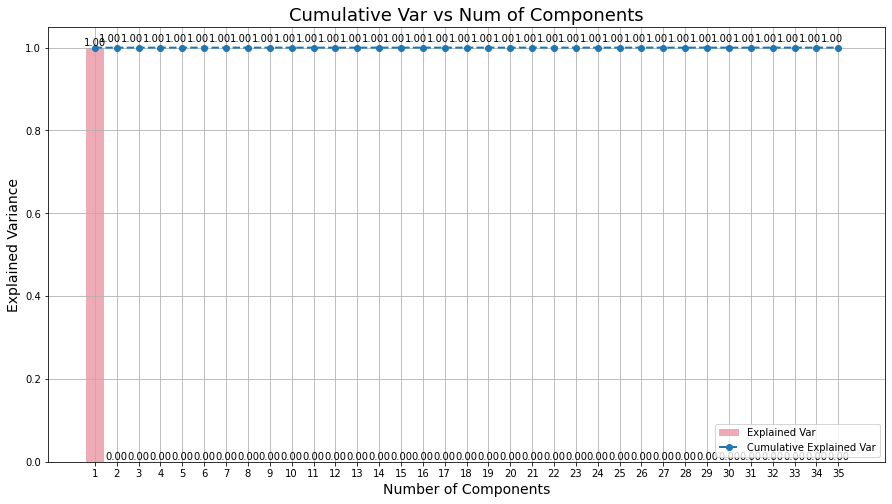

In [81]:
# 데이터의 스케일을 맞춰놓았으니, 이번에는 차원 축소(Dimensionality Reduction)를 진행할 차례네요!
## 여기서는 PCA 라는 선형 차원 축소 기법을 사용해봅시다. PCA 의 PC들이 포착하지 못해서 날라간 정보들은 다른 DR 방법을 통해 보완할 수 있어요

# PCA 불러오기  
from sklearn.decomposition import PCA


# PCA 적용
pca = PCA().fit(rs_df)

print(pca)
print(type(pca))

# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ 
    # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
    # EVR: 각 주성분이 데이터의 분산을 얼마나 포착하는지를 나타내는 비율


cumulative_explained_variance = np.cumsum(explained_variance_ratio) 
    # cumsum: 각 원소의 누적합을 계산하는 함수

# 시각화

plt.figure(figsize=(15,8))

# 각 성분의 EVR에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) +1)) , y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 line graph
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Var vs Num of Components', fontsize=18)

# 눈금 및 범례 설정
plt.xticks(range(0,len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
              labels=['Explained Var', 'Cumulative Explained Var'])

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
        plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha ='center', va= 'bottom', fontsize=10)
        if i > 0:
            plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='both')
plt.show

(pca.explained_variance_ratio_).sum()

PCA()
<class 'sklearn.decomposition._pca.PCA'>


0.9999999999999999

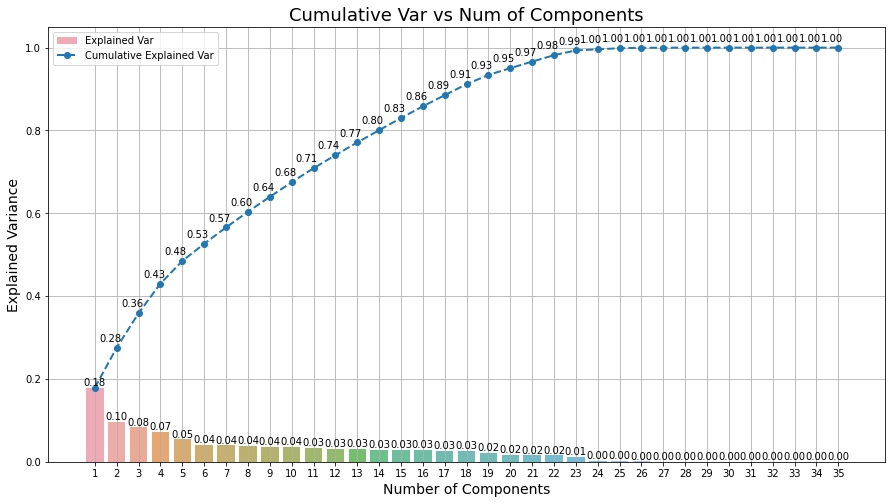

In [84]:
# 데이터의 스케일을 맞춰놓았으니, 이번에는 차원 축소(Dimensionality Reduction)를 진행할 차례네요!
## 여기서는 PCA 라는 선형 차원 축소 기법을 사용해봅시다. PCA 의 PC들이 포착하지 못해서 날라간 정보들은 다른 DR 방법을 통해 보완할 수 있어요

# PCA 불러오기  
from sklearn.decomposition import PCA


# PCA 적용
pca = PCA().fit(mm_df)

print(pca)
print(type(pca))

# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ 
    # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
    # EVR: 각 주성분이 데이터의 분산을 얼마나 포착하는지를 나타내는 비율


cumulative_explained_variance = np.cumsum(explained_variance_ratio) 
    # cumsum: 각 원소의 누적합을 계산하는 함수

# 시각화

plt.figure(figsize=(15,8))

# 각 성분의 EVR에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) +1)) , y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 line graph
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Var vs Num of Components', fontsize=18)

# 눈금 및 범례 설정
plt.xticks(range(0,len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
              labels=['Explained Var', 'Cumulative Explained Var'])

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
        plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha ='center', va= 'bottom', fontsize=10)
        if i > 0:
            plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='both')
plt.show
(pca.explained_variance_ratio_).sum()

## 뭔가 잘못된듯 하니 scatterplot 을 찍어보자
- 뭐가 이상한건지 잘 모르겠으나.. 시간 관계상 넘어간다

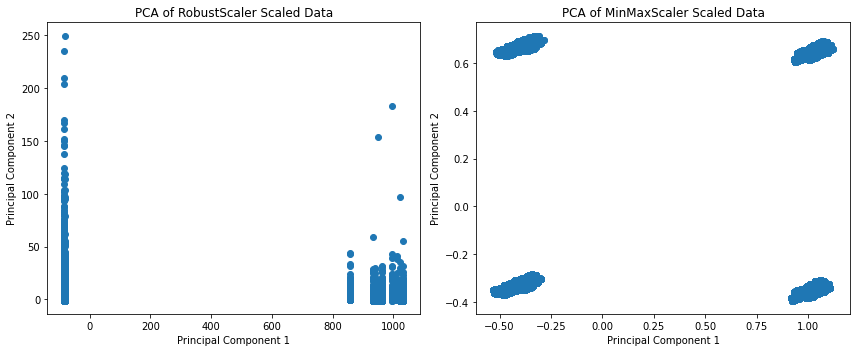

In [86]:
# Sample DataFrame
# df = pd.DataFrame(...)  # Replace with your dataframe

# Scale the data and apply PCA
robust_scaled_data = pca.fit_transform(rs_df)
minmax_scaled_data = pca.fit_transform(mm_df)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RobustScaler Plot
axes[0].scatter(robust_scaled_data[:, 0], robust_scaled_data[:, 1])
axes[0].set_title('PCA of RobustScaler Scaled Data')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# MinMaxScaler Plot
axes[1].scatter(minmax_scaled_data[:, 0], minmax_scaled_data[:, 1])
axes[1].set_title('PCA of MinMaxScaler Scaled Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


# 회고

## New Features
- distance : merch_long lat 과 카드 홀더의 long lat 거리 차이
- abnorm_tod : 자정-새벽 6시 사이 결제된 건. 생각해보니 미국 timezone이 다른데 감안 못했다. 다음 기회에!
- is_weekend
- amt_binned
- age
> 계산에 이용된 기존 컬럼은 대부분 drop

## 잘한 점
- 지도 라이브러리 등을 bash 에서 pip install 해서 써봤다
    - 구글 검색하니 다 나와서 어려운 점은 없었다
- 할일 적어놓고 중간중간 체크하기
    - 체크포인트 하나가 길어질수록 다시 빠져나와서 방향잡기가 어렵다

## 보완할 점
- 지도나 geopy (lat long 주고 거리 구하는 것) 라이브러리로 계산하기에는 열 수가 너무 많아서 넘 오래걸린다.. 어떻게 시간 단축할 수 있을지?
- 새로운 칼럼 만들어놓고 해당 칼럼이 내가 의도한 바 대로 작동했는지 샘플 뽑아 확인하는 과정이 없었다!
- 그닥 예측력이 높지 않다!

## 케글의 다른 사람 EDA 에서 배운 점 
- [링크](https://www.kaggle.com/code/hidzqialbaqir/eda-fraud-transaction)
- 'is_fraud' 칼럼을, 즉 정답지를 이미 알고있다는 걸 레버리지 한다
- 애초에 is_fraud == 1 or 0 을 구분지어서, 어떤 feature 가 영향이 큰지를 그래프로 시각화해서 확인한다
- 이렇게 하면 좋은 점: elbow point(?) 확인 가능
    - 예를 들어, 나는 datetime에서 주중/주말 vs 늦은 시간 이렇게 2개의 피처만 추출
    - 하지만 시각화해보면 '연도' 와 '요일' 이 중요하다는 것
    - 그리고 나는 늦은 시간을 자정 - 06시로 자른 반면, 데이터 상으로는 22시 이후 is_fraud 가 높아짐을 확인할 수 있다
- **결론: train data 라는 점을 잘 써먹자!**